In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
file_path = 'D:\\SKRIPSI\\laptops.csv'
laptops_df = pd.read_csv(file_path)

inr_to_idr = 183.93  # 1 Indian Rupee (INR) = 185.84 Indonesian Rupiah (IDR) as of 10/09/2024
inr_to_usd = 0.012  # 1 Indian Rupee (INR) = 0.012 US Dollar (USD) as of 10/09/2024
laptops_df['Price_Rupiah'] = laptops_df['Price'] * inr_to_idr
laptops_df['Price_USD'] = laptops_df['Price'] * inr_to_usd

laptops_df.head()  


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,Price_Rupiah,Price_USD
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,intel,integrated,False,15.6,1920,1080,windows,1,4412480.7,287.88
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,intel,integrated,False,15.6,1920,1080,windows,1,6619640.7,431.88
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,amd,dedicated,False,15.6,1920,1080,windows,1,9398823.0,613.20
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,intel,integrated,False,14.0,1920,1080,windows,1,7355360.7,479.88
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,amd,integrated,False,15.6,1920,1080,windows,1,5256719.4,342.96


In [24]:
missing_values = laptops_df.isnull().sum()  # Check for missing values
duplicate_rows = laptops_df.duplicated().sum()  # Check for duplicate rows
data_types = laptops_df.dtypes  # Get the data types of columns
summary_statistics = laptops_df.describe()  # Summary statistics of numerical columns
print("Missing Values")
print(missing_values)
print("")
print("Duplicate Rows")
print(duplicate_rows)

Missing Values
index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
Price_Rupiah                  0
Price_USD                     0
dtype: int64

Duplicate Rows
0


In [25]:
print("Data Types")
print(data_types)

Data Types
index                           int64
brand                          object
Model                          object
Price                           int64
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
Price_Rupiah                  float64
Price_USD                     float64
dtype: object


In [26]:
print(summary_statistics)

             index          Price      Rating   num_cores  num_threads  \
count   991.000000     991.000000  991.000000  991.000000   991.000000   
mean    505.860747   77266.504541   63.931382    8.128153    12.191726   
std     287.899458   57384.910269   10.190575    4.215499     5.585115   
min       1.000000    9800.000000   24.000000    2.000000     0.000000   
25%     258.500000   43595.000000   58.000000    6.000000     8.000000   
50%     507.000000   61900.000000   64.000000    8.000000    12.000000   
75%     754.500000   89245.000000   71.000000   10.000000    16.000000   
max    1002.000000  454490.000000   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  991.000000                991.000000                  991.000000   
mean    13.047427                610.938446                    4.004036   
std      5.591188                266.927666                   33.553936   
min      2.000000                

In [27]:
laptops_df['year_of_warranty'] = pd.to_numeric(laptops_df['year_of_warranty'], errors='coerce')

categorical_columns = ['brand', 'processor_brand', 'processor_tier', 'gpu_brand', 'gpu_type', 'OS']
laptops_df_encoded = pd.get_dummies(laptops_df, columns=categorical_columns)
print("Cleaned Data Summary:\n", laptops_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [28]:
# Display the encoded data
print(laptops_df_encoded.head())

   index                                              Model  Price  Rating  \
0      1  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990      63   
1      2  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990      67   
2      3  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100      73   
3      4  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990      62   
4      5  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580      62   

   num_cores  num_threads  ram_memory primary_storage_type  \
0          2            4           8                  SSD   
1          4            8          16                  SSD   
2          6           12           8                  SSD   
3         12           16           8                  SSD   
4          4            8           8                  SSD   

   primary_storage_capacity secondary_storage_type  ...  gpu_type_apple  \
0                       512   No secondary storage  ...               0   
1       

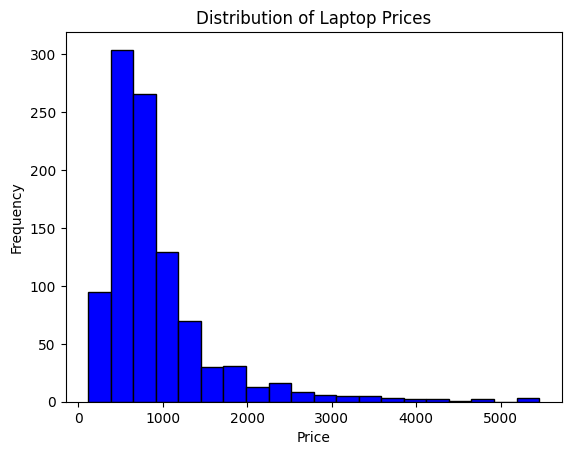

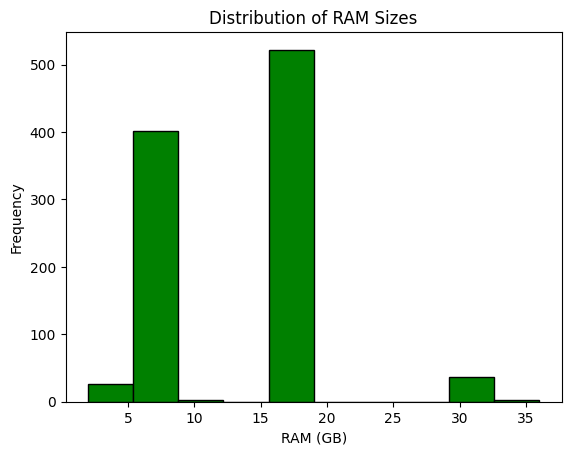

In [33]:
import matplotlib.pyplot as plt

# Distribution of laptop prices
plt.hist(laptops_df['Price_USD'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of RAM sizes
plt.hist(laptops_df['ram_memory'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()
